In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.duplicated().sum()

0

In [19]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [22]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [55]:
X = df.drop(['Exited'],axis=1)
Y = df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train.shape

(8000, 10)

In [50]:
X_train_scaled.shape

(8000, 10)

In [52]:
X_test_scaled.shape

(2000, 10)

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [155]:
model = Sequential()
model.add(Dense(9,activation='relu',input_dim=10))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [156]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 9)                 99        
                                                                 
 dense_17 (Dense)            (None, 5)                 50        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [179]:
history = model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8664
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8656
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8676
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8659
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8652
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8660
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8666
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8661
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8675
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accura

In [181]:
model.layers[0].get_weights()

[array([[-0.01853233,  0.204739  , -0.10291378,  0.10919369, -0.10887685,
         -0.2509849 ,  0.16213934, -0.20258027,  0.15843987],
        [-1.2389908 , -0.38777563,  1.2233423 , -0.02671478, -0.41837576,
         -0.10979938, -0.05480225, -0.07632265, -0.6266016 ],
        [ 0.03555414,  0.15511051, -0.03371849,  0.3683783 , -0.1136324 ,
          0.04932401,  0.08149762,  0.01558953,  0.14684892],
        [ 0.10831136, -0.7498473 , -0.49780533,  0.43765146,  1.2741919 ,
         -0.97498196, -0.2654997 , -0.84947973, -0.98856443],
        [ 0.01860641, -0.5308477 ,  0.07006064,  0.15887967,  0.08735546,
          0.23125269, -0.10789159,  0.00382913,  0.10721471],
        [ 0.5638043 , -0.3295479 ,  0.55595064, -0.57404524,  0.2614634 ,
         -0.35009724,  0.00351545,  0.09236398, -0.03138737],
        [ 0.630729  ,  0.943891  ,  0.5813551 , -0.3439248 ,  0.5640999 ,
          0.39856118,  0.77038014,  1.4292305 ,  0.7943051 ],
        [-0.04509169, -0.06114946, -0.07839956, 

In [180]:
model.layers[1].get_weights()

[array([[-0.24155885,  0.06778671, -0.179084  ,  0.29941952,  1.2149135 ],
        [ 0.20424093,  0.17907134,  0.7778387 ,  0.4864216 ,  0.20739593],
        [-0.01813782,  0.47232124,  0.48434737,  0.5520565 ,  0.5213105 ],
        [-0.05720538, -0.608197  ,  0.29593202,  0.38833678, -0.10262022],
        [-1.3748255 ,  0.63249445,  0.78979367, -0.20938191, -0.55296665],
        [-0.8589193 , -1.033474  , -0.3375508 ,  0.07038143,  0.33416754],
        [-0.9943731 ,  0.275549  , -2.7359617 ,  0.47191826,  0.73179597],
        [ 0.6218796 ,  1.3182305 ,  0.05916252,  0.02892097, -0.1826951 ],
        [ 0.9611127 ,  0.8851653 ,  0.34837505, -0.5663703 ,  0.6280536 ]],
       dtype=float32),
 array([ 0.9120419 , -0.6796544 , -0.94170135, -0.2818381 , -0.14122674],
       dtype=float32)]

In [182]:
y_temp = model.predict(X_test_scaled)

63/63 [==============================] - 0s 903us/step


In [183]:
y_pred = np.where(y_temp>0.5,1,0)

In [184]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [186]:
accuracy_score(y_test, y_pred)

0.8635

In [187]:
confusion_matrix(y_test,y_pred)

array([[1549,   51],
       [ 222,  178]])

In [188]:
f1_score(y_test,y_pred)

0.5659777424483307

In [190]:
history.history

{'loss': [0.32860851287841797,
  0.32827046513557434,
  0.3286875784397125,
  0.32868969440460205,
  0.3282976448535919,
  0.328463613986969,
  0.328512966632843,
  0.3286852538585663,
  0.3286166489124298,
  0.32877013087272644,
  0.3283678889274597,
  0.32904765009880066,
  0.3282262086868286,
  0.32828325033187866,
  0.32852229475975037,
  0.32805660367012024,
  0.3281440734863281,
  0.3280883729457855,
  0.32847392559051514,
  0.32829445600509644,
  0.32829907536506653,
  0.32873308658599854,
  0.3281606435775757,
  0.32854530215263367,
  0.3283887207508087,
  0.3285726308822632,
  0.3281235992908478,
  0.328415185213089,
  0.328036904335022,
  0.32818037271499634,
  0.32837313413619995,
  0.32824650406837463,
  0.32797756791114807,
  0.32848620414733887,
  0.32831618189811707,
  0.3290916383266449,
  0.32778415083885193,
  0.32849353551864624,
  0.32818910479545593,
  0.32820966839790344,
  0.328224241733551,
  0.32785236835479736,
  0.32824328541755676,
  0.32822170853614807,
  0

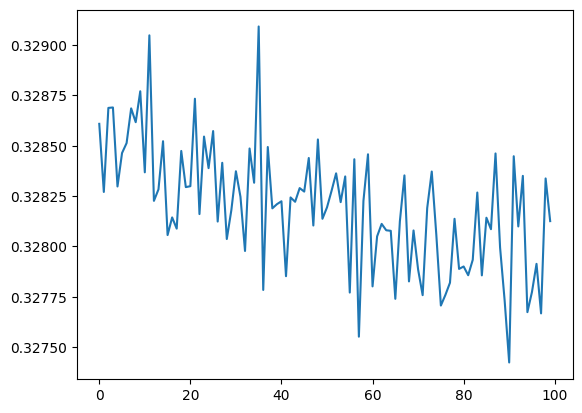

In [192]:
plt.plot(history.history['loss'],)